# Projeto bom pagador

## 1 - Importação 

In [1]:
# importação das bibliotecas:
import pandas as pd
import numpy as np

### 1.1 - Coleta dos dados: https://www.kaggle.com/laotse/credit-risk-dataset

### 1.2 - Relação dos campos do dataset:

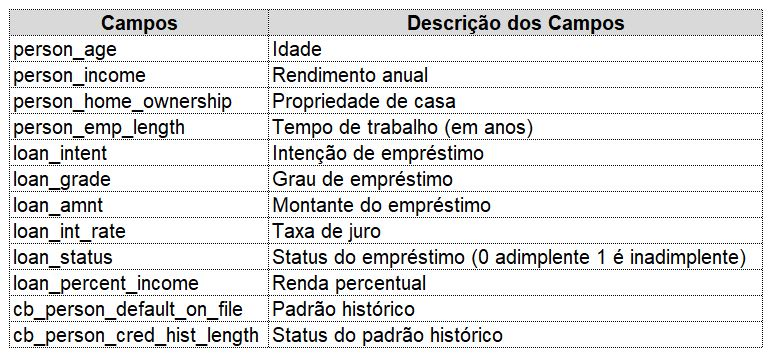



In [2]:
# Importação do dataset:
base = pd.read_csv("/home/rafael/git/projeto_bom_pagador/notebooks/paulo/credit_risk_dataset.csv")

# Definição dos campos que serão utilizados:
base2 = base[['person_age','person_income','person_emp_length','loan_intent','loan_amnt','loan_int_rate','loan_percent_income','loan_status']]
base2 = base2.rename(columns={'person_age':'idade','person_income':'renda','person_emp_length':'tempo_trabalho','loan_intent':'finalidade','loan_amnt':'valor_emprestimo','loan_int_rate':'taxa','loan_percent_income':'renda_emprestimo'})
base = base2

del base2

base.head()

,idade,renda,tempo_trabalho,finalidade,valor_emprestimo,taxa,renda_emprestimo,loan_status
0,22,59000,123.0,PERSONAL,35000,16.02,0.59,1
1,21,9600,5.0,EDUCATION,1000,11.14,0.10,0
2,25,9600,1.0,MEDICAL,5500,12.87,0.57,1
3,23,65500,4.0,MEDICAL,35000,15.23,0.53,1
4,24,54400,8.0,MEDICAL,35000,14.27,0.55,1


## 2 - Análise do dataset:

In [3]:
# Identificando os tipos de dados:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   idade             32581 non-null  int64  
 1   renda             32581 non-null  int64  
 2   tempo_trabalho    31686 non-null  float64
 3   finalidade        32581 non-null  object 
 4   valor_emprestimo  32581 non-null  int64  
 5   taxa              29465 non-null  float64
 6   renda_emprestimo  32581 non-null  float64
 7   loan_status       32581 non-null  int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 2.0+ MB


### 2.2 - Identificação de campos com dados ausentes:

In [4]:
campo = list(base.columns)
qnt = list(base.isnull().sum())
represent = list(round((base.isnull().sum()/len(base))*100,2))

matriz_ausente = pd.DataFrame(qnt, index = campo, columns =['qnt'])
matriz_ausente['% represent'] = represent
matriz_ausente

,qnt,% represent
idade,0,0.00
renda,0,0.00
tempo_trabalho,895,2.75
finalidade,0,0.00
valor_emprestimo,0,0.00
taxa,3116,9.56
renda_emprestimo,0,0.00
loan_status,0,0.00


In [5]:
# Relação dos dados ausentess tempo_trabalho e taxa:

## Apresentação dos 5 primeiros da relação
base.loc[base['tempo_trabalho'].isnull() & base['taxa'].isnull()].head(5)

,idade,renda,tempo_trabalho,finalidade,valor_emprestimo,taxa,renda_emprestimo,loan_status
379,24,16800,NaN,DEBTCONSOLIDATION,3900,NaN,0.23,1
1388,22,26400,NaN,HOMEIMPROVEMENT,1550,NaN,0.06,1
1395,22,26400,NaN,PERSONAL,1000,NaN,0.04,1
1651,23,28296,NaN,PERSONAL,7000,NaN,0.25,0
1698,23,28800,NaN,MEDICAL,10625,NaN,0.37,0


In [6]:
# Qnt. dados ausentes tempo_trabalho e taxa
len(base[['tempo_trabalho','taxa']].loc[base['tempo_trabalho'].isnull() & base['taxa'].isnull()])

68

In [7]:
base.loc[base['tempo_trabalho'].isnull() | base['taxa'].isnull()].groupby('loan_status')['loan_status'].count()

loan_status
0    3038
1     905
Name: loan_status, dtype: int64

In [8]:
total_ausente = matriz_ausente['qnt'].sum() - len(base[['tempo_trabalho','taxa']].loc[base['tempo_trabalho'].isnull() & base['taxa'].isnull()])
round(total_ausente/len(base)*100,2)

12.1

### 2.3 - Validação do campo "idade":

In [9]:
# Identificar idade negativa
print(base['idade'].loc[base['idade'] > 90].sum())
print(len(base))
print((base['idade'].loc[base['idade'] > 90].sum()/len(base))*100)


772
32581
2.3694791442865473


### 2.4 - Validação do campo "tempo_trabalho":

In [10]:
print(base['tempo_trabalho'].loc[base['tempo_trabalho'] <= 0].sum())
print(len(base))
print((base['tempo_trabalho'].loc[base['tempo_trabalho'] <=0].sum()/len(base))*100)

0.0
32581
0.0


In [11]:
# Verificando se existe tempo de trabalho maior que idade:

def validacao(idade,tempo):
    if idade <= tempo:
        return 'erro'
    else:
        return 'correto'

base['val_tempotrabalho']= base.apply(lambda x: validacao(x['idade'],x['tempo_trabalho']),axis =1)

base.head()

,idade,renda,tempo_trabalho,finalidade,valor_emprestimo,taxa,renda_emprestimo,loan_status,val_tempotrabalho
0,22,59000,123.0,PERSONAL,35000,16.02,0.59,1,erro
1,21,9600,5.0,EDUCATION,1000,11.14,0.10,0,correto
2,25,9600,1.0,MEDICAL,5500,12.87,0.57,1,correto
3,23,65500,4.0,MEDICAL,35000,15.23,0.53,1,correto
4,24,54400,8.0,MEDICAL,35000,14.27,0.55,1,correto


In [12]:
pd.DataFrame(base.groupby('val_tempotrabalho')['val_tempotrabalho'].count())

,val_tempotrabalho
val_tempotrabalho,
correto,32579
erro,2


### 2.5 - Validação do campo "renda":

In [13]:
print(base['renda'].loc[base['renda'] <= 0].sum())
print(len(base))
print((base['renda'].loc[base['renda'] <=0].sum()/len(base))*100)

0
32581
0.0


### 2.6 - Validação do campo "taxa":

In [14]:
base['taxa'].loc[base['taxa']<=0].sum()

0.0

In [16]:
# Validação da taxa
aggregations = {
    'taxa': {
    'tx_min': 'min',
    'tx_max': 'max',
    'tx_media': 'mean'

    },
    'renda': {
    'renda_min': 'min',
    'renda_max': 'max',
    'renda_media': 'mean'

    },
}

agrupamento = base.groupby('finalidade').agg(aggregations)
agrupamento

SpecificationError: nested renamer is not supported

### 2.7 - Validação do campo "valor_emprestimo":

In [17]:
print(base['valor_emprestimo'].loc[base['valor_emprestimo'] <= 0].sum())
print(len(base))
print((base['valor_emprestimo'].loc[base['valor_emprestimo'] <=0].sum()/len(base))*100)

0
32581
0.0


### 2.8 - Validação do campo "finalidade":

In [18]:
# Tipos de finalidade:

pd.DataFrame(base['finalidade'].unique())

,0
0,PERSONAL
1,EDUCATION
2,MEDICAL
3,VENTURE
4,HOMEIMPROVEMENT
5,DEBTCONSOLIDATION


In [19]:
round((base.groupby('finalidade')['finalidade'].count()/len(base))*100,2)

finalidade
DEBTCONSOLIDATION    16.00
EDUCATION            19.81
HOMEIMPROVEMENT      11.06
MEDICAL              18.63
PERSONAL             16.95
VENTURE              17.55
Name: finalidade, dtype: float64

In [20]:
base.groupby('finalidade')['valor_emprestimo'].sum()

finalidade
DEBTCONSOLIDATION    50008550
EDUCATION            61191725
HOMEIMPROVEMENT      37349675
MEDICAL              56214925
PERSONAL             52856800
VENTURE              54809625
Name: valor_emprestimo, dtype: int64

In [21]:
base.groupby('loan_status')['loan_status'].count()

loan_status
0    25473
1     7108
Name: loan_status, dtype: int64

### 2.1 - Conclusão análise dataset:

## 3 - Pré-processamento:

In [22]:
# Definindo base para tratamento dos dados:

base.isnull().sum()

idade                   0
renda                   0
tempo_trabalho        895
finalidade              0
valor_emprestimo        0
taxa                 3116
renda_emprestimo        0
loan_status             0
val_tempotrabalho       0
dtype: int64

In [23]:
# Como os dados faltantes estão na mesma proporção, resolve-se remover ao invés de substituir/incluir:
base = base.dropna()
# Removendo registros incorretos tempo_trabalho:
base = base.loc[base['val_tempotrabalho'] != 'erro']
# Removendo campo criado para validação
base.drop('val_tempotrabalho',axis=1, inplace = True)
# Removendo registros que contenham idade maior ou igual a 80 anos:
base = base.loc[base['idade']< 80]

len(base)

28630

## 3.1 - Balanceamento dos dados:

In [78]:
base.rename(columns={'idade':'Idade', 'renda':'Renda', 'tempo_trabalho':'Tempo Trabalho','finalidade':'Finalidade', 'valor_emprestimo': 'Emprestimo', 'taxa':'Taxa', 'renda_emprestimo':'Renda Emp.', 'loan_status':'Situação'}, inplace=True)

In [83]:
df = base[['Renda','Idade', 'Emprestimo', 'Finalidade', 'Tempo Trabalho', 'Taxa', 'Renda Emp.', 'Situação']]

In [84]:
df['Taxa'] = round(df['Taxa'],2)

In [85]:
df.to_csv('base2.csv')

In [82]:
t = pd.read_csv("/home/rafael/git/projeto_bom_pagador/notebooks/paulo/base2.csv")
t

,Unnamed: 0,Renda,Idade,Emprestimo,Finalidade,Tempo Trabalho,Taxa,Situação
0,1,9600,21,1000,EDUCATION,5.0,11.14,0
1,2,9600,25,5500,MEDICAL,1.0,12.87,1
2,3,65500,23,35000,MEDICAL,4.0,15.23,1
3,4,54400,24,35000,MEDICAL,8.0,14.27,1
4,5,9900,21,2500,VENTURE,2.0,7.14,1
...,...,...,...,...,...,...,...,...
28625,32576,53000,57,5800,PERSONAL,1.0,13.16,0
28626,32577,120000,54,17625,PERSONAL,4.0,7.49,0
28627,32578,76000,65,35000,HOMEIMPROVEMENT,3.0,10.99,1
28628,32579,150000,56,15000,PERSONAL,5.0,11.48,0


In [24]:
previsores = base.iloc[:,0:7].values
previsores

array([[21, 9600, 5.0, ..., 1000, 11.14, 0.1],
       [25, 9600, 1.0, ..., 5500, 12.87, 0.57],
       [23, 65500, 4.0, ..., 35000, 15.23, 0.53],
       ...,
       [65, 76000, 3.0, ..., 35000, 10.99, 0.46],
       [56, 150000, 5.0, ..., 15000, 11.48, 0.1],
       [66, 42000, 2.0, ..., 6475, 9.99, 0.15]], dtype=object)

In [25]:
classe = base.iloc[:,7].values
classe

array([0, 1, 1, ..., 1, 0, 0])

In [26]:
# Transformação dos dados categóricos em numéricos:

from sklearn.preprocessing import LabelEncoder
labelencoder_previsores = LabelEncoder()
# campo finalidade
previsores[:,3] = labelencoder_previsores.fit_transform(previsores[:,3])
previsores

array([[21, 9600, 5.0, ..., 1000, 11.14, 0.1],
       [25, 9600, 1.0, ..., 5500, 12.87, 0.57],
       [23, 65500, 4.0, ..., 35000, 15.23, 0.53],
       ...,
       [65, 76000, 3.0, ..., 35000, 10.99, 0.46],
       [56, 150000, 5.0, ..., 15000, 11.48, 0.1],
       [66, 42000, 2.0, ..., 6475, 9.99, 0.15]], dtype=object)

In [27]:
# Padronização
from sklearn.preprocessing import StandardScaler
escalonamento = StandardScaler()
previsores = escalonamento.fit_transform(previsores)
previsores

array([[-1.08983633, -1.10238046,  0.0544313 , ..., -1.36782151,
         0.03102708, -0.65336549],
       [-0.43999744, -1.10238046, -0.93673933, ..., -0.65668359,
         0.56673097,  3.76551046],
       [-0.76491688, -0.01795604, -0.19336136, ...,  4.00522059,
         1.29751777,  3.38943591],
       ...,
       [ 6.0583914 ,  0.18573728, -0.44115402, ...,  4.00522059,
        -0.01542123,  2.73130545],
       [ 4.59625391,  1.62129018,  0.0544313 , ...,  0.84460759,
         0.13630993, -0.65336549],
       [ 6.22085113, -0.47384108, -0.68894667, ..., -0.5026037 ,
        -0.32507665, -0.18327231]])

In [28]:
# Divisão da Base em treino e teste(25%)
from sklearn.model_selection import train_test_split
previsores_treinamento, previsores_teste, classe_treinamento, classe_teste = train_test_split(previsores, classe, test_size=0.25, random_state=0)

In [29]:
# Conferência do tamanho da divisão:

print(len(previsores_treinamento))
print(len(classe_treinamento))
print(len(previsores_teste))
print(len(classe_teste))

21472
21472
7158
7158


In [30]:
# Treinando Algoritico Naive Bayes

from sklearn.naive_bayes import GaussianNB
classificador = GaussianNB()
classificador.fit(previsores_treinamento, classe_treinamento)
previsoes = classificador.predict(previsores_teste)

from sklearn.metrics import confusion_matrix, accuracy_score
precisao = accuracy_score(classe_teste, previsoes)

In [31]:
# Matriz de Confusão
matriz = confusion_matrix(classe_teste, previsoes)
pd.DataFrame(matriz)

,0,1
0,5150,474
1,797,737


In [32]:
precisao*100

82.24364347583123